In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder

In [56]:
df = pd.read_csv('/content/Mall_Customers.csv')

In [57]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [58]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [59]:
ohe = OneHotEncoder(sparse_output=False)
gender = ohe.fit_transform(df[['Genre']])
df = pd.concat([df,pd.DataFrame(gender)],axis=1)

In [60]:
df = df.rename(columns={0:'Male',1:'Female'})
X = df.drop(['CustomerID','Genre','Male','Female'],axis=1)

In [61]:
X

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


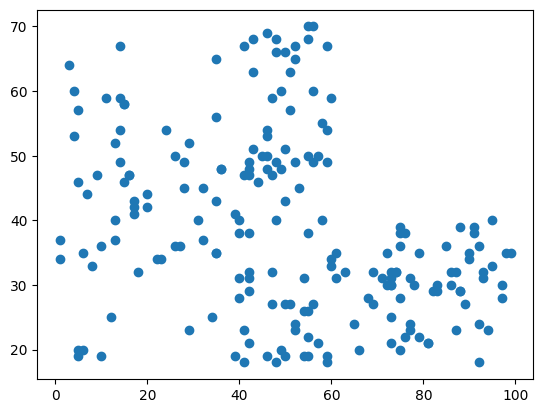

In [62]:
plt.scatter(X['Spending Score (1-100)'],X['Age'],marker='o')

#**Elbow Method**

In [76]:
inertia = []

for k in range(1,11):
  kmeans = KMeans(n_clusters=k,random_state=42)
  kmeans.fit(X)
  inertia.append(kmeans.inertia_)


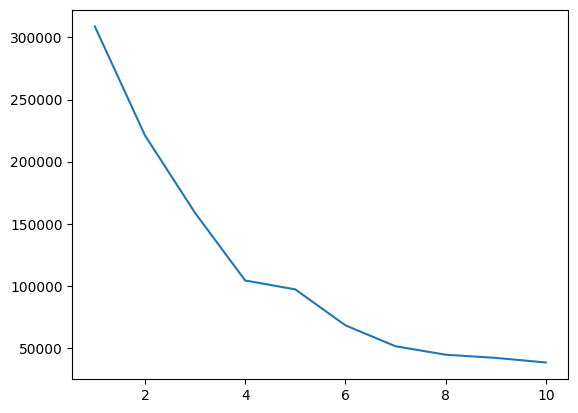

In [77]:
plt.plot(range(1,11),inertia)
plt.show()

#**Number of Clusters = 4**

In [78]:
kmeans = KMeans(n_clusters=4,random_state=42)
kmeans.fit(X)

KMeans(n_clusters=4, random_state=42)

In [79]:
y_pred = kmeans.predict(X)

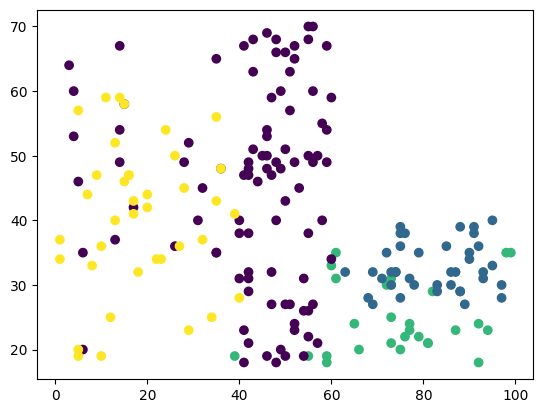

In [80]:
plt.scatter(X['Spending Score (1-100)'],X['Age'],c=y_pred,marker='o')

#**k=3**

In [81]:
kmeans = KMeans(n_clusters=3,random_state=42)
kmeans.fit(X)

KMeans(n_clusters=3, random_state=42)

In [82]:
y_pred =  kmeans.predict(X)

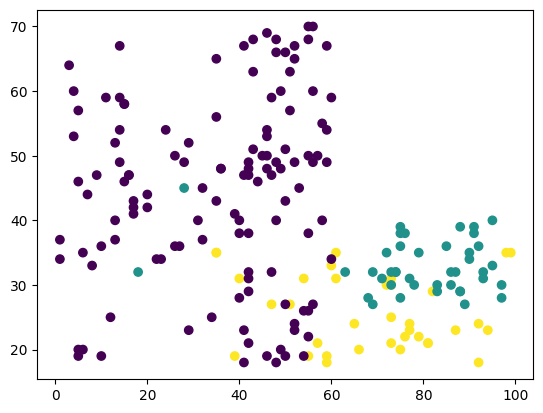

In [83]:
plt.scatter(X['Spending Score (1-100)'],X['Age'],c=y_pred,marker='o')

#**Silhouette Score**

In [84]:
from sklearn.metrics import silhouette_score

sil = []

for k in range(2,11):
  kmeans = KMeans(n_clusters=k,random_state=42)
  cluster_labels = kmeans.fit_predict(X)
  sil_avg = silhouette_score(X,cluster_labels)
  sil.append(sil_avg)

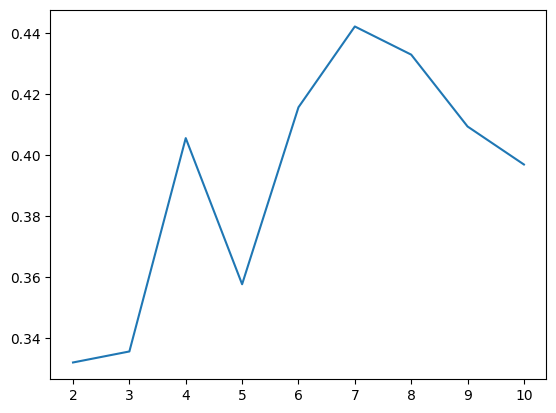

In [85]:
plt.plot(range(2,11),sil)

**According to Silhouette Score, 7 is best value for k**

In [86]:
kmeans = KMeans(n_clusters=7,random_state=42)
kmeans.fit(X)

KMeans(n_clusters=7, random_state=42)

In [87]:
y_pred = kmeans.predict(X)

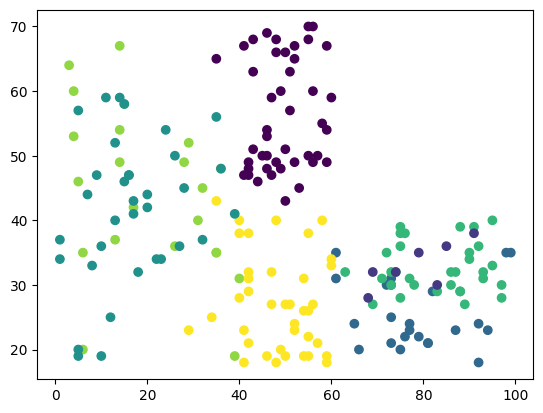

In [88]:
plt.scatter(X['Spending Score (1-100)'],X['Age'],c=y_pred)